In [ ]:
# Fill in your name using the given format
your_name = "LAST_NAME, FIRST_NAME"

In [ ]:
# For use in colab
!pip install openml --quiet
!pip install -U scikit-learn --quiet

# Assignment 1
We will study classifiers on the [Kuzushiji dataset](https://www.openml.org/d/41982).
As you can [read in the paper](https://arxiv.org/abs/1812.01718), Kuzushiji is a handwritten 
Japanese script that was used for thousands of years, but most Japanese natives cannot read
it anymore. We'll try to use machine learning to recognize the characters, and translate them to
modern Japanese (Hiragana) characters.

The dataset that we will use contains scanned 28-by-28 pixel images of such handwritten characters.

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import time
import math
import tqdm
%matplotlib inline

# Pre-flight checklist. Do not change this code.
# Make sure that you have installed recent versions of key packages.
from packaging import version
import sklearn
sklearn_version = sklearn.__version__
if version.parse(sklearn_version) < version.parse("0.24.0"):
    print("scikit-learn is outdated: {}. Please update now! pip install -U scikit-learn".format(sklearn_version))
else:
    print("OK. You may continue :)")

OK. You may continue :)


In [ ]:
# Download Kuzushiji-MNIST data. Takes a while the first time.
# You may receive a warning about data compression but you can ignore that.
data = openml.datasets.get_dataset(41982)
X, y, _, _ = data.get_data(target=data.default_target_attribute);
X = X/265 # Simple scaling 

# These are the names of the modern characters (our 10 classes)
data_classes = {0:"o", 1: "ki", 2: "su", 3: "tsu", 4: "na", 5: "ha", 
                6: "ma", 7: "ya", 8: "re", 9: "wo"}

In [ ]:
# Plotting functions. Don't edit these.
%matplotlib inline
from IPython import display

def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0,1), ylabel='score', marker = '.'):
    """ Renders a plot that updates with every evaluation from the evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 1))
    ylabel -- the y-axis title
    """
    # Plot interactively
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)
    
    # Make the scale look nice
    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)
        
    # Start from empty plot, then fill it
    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i) 
        if i == param_range[0]: # initialize series
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = marker, label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys(): # append new data
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)

# Plots data instances as 28x28 images
def plot_examples(images, labels, row_length=5):
    nr_rows = math.floor(len(images) / row_length)
    if (len(images) % row_length) > 0:
        nr_rows += 1
    fig, axes = plt.subplots(nr_rows, row_length, figsize=(10, 1.3* nr_rows))
    for i, n in enumerate(images):
        if len(images) > row_length:
            axes[math.floor(i/row_length)][i%row_length].imshow(n.reshape(28, 28), cmap=plt.cm.gray_r)
            axes[math.floor(i/row_length)][i%row_length].set_xlabel(data_classes[int(labels[i])])
            axes[math.floor(i/row_length)][i%row_length].set_xticks(())
            axes[math.floor(i/row_length)][i%row_length].set_yticks(())
        else:
            axes[i].imshow(n.reshape(28, 28), cmap=plt.cm.gray_r)
            axes[i].set_xlabel(data_classes[int(labels[i])])
            axes[i].set_xticks(())
            axes[i].set_yticks(())       
    plt.show();

# Plots the coefficients of the given model as 28x28 heatmaps. 
def plot_coefficients(coef, name):
    """ Renders a 28x28 heatmap of the model's trained coefficients.
    Keyword arguments:
    coef -- the model coefficients
    name -- a title for the produced figure
    """
    fig, ax = plt.subplots(1,1,figsize=(3,3))
    fig.suptitle(name)
    ax.imshow(coef.reshape(28,28))
    ax.set_xticks(()), ax.set_yticks(())

### Peeking at the data
If we plot the characters, we see that there is quite some variation. The same
character can be written in a number of different ways.

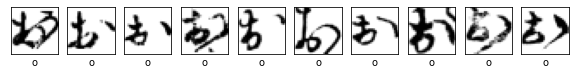

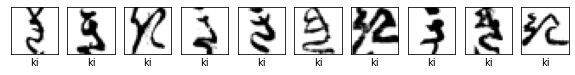

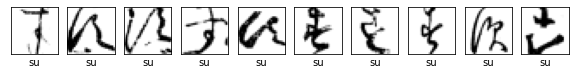

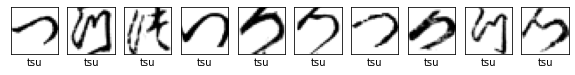

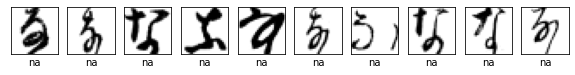

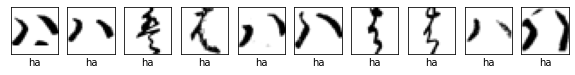

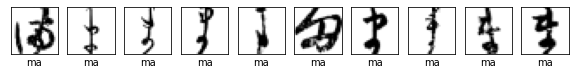

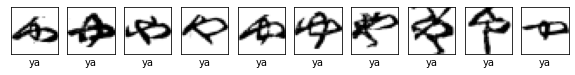

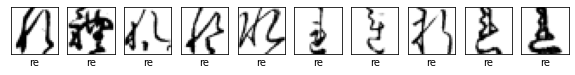

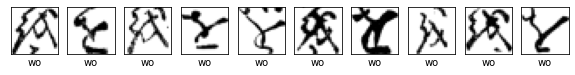

In [ ]:
# Gets indices of examples with the given class
def y_class(c):
    return y[y == str(c)].index.values.tolist()[0:10]

for i in range(10):
    plot_examples(X.to_numpy()[y_class(i)], y.to_numpy()[y_class(i)], row_length=10)

### Question 1.1 (1 point)
Implement a function `evaluate_LR` that evaluates a Logistic Regression model for a given regularization constant (C) and returns the train and test score of a 5-fold cross-validation using the accuracy metric.

In [ ]:
# Implement
def evaluate_LR(X, y, C):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    C -- the value for the regularization hyperparameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    pass

In [ ]:
# MODEL IMPLEMENTATION:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
def evaluate_LR(X, y, C):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    C -- the value for the regularization hyperparameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    score = cross_validate(LogisticRegression(C=C), X, y, return_train_score= True, cv=5, n_jobs=-1)
    res = {'train': np.mean(score['train_score']),
           'test': np.mean(score['test_score'])}
    return res

### Question 1.2 (2 points)

Implement a function `plot_curve` that plots the results of `evaluate_LR` on a 10% stratified subsample of the Kuzushiji MNIST dataset for gamma values ranging from 1e-8 to 1e3 (on a log scale, at least 12 values), and C=1. You can use the plotting function `plot_live` defined above (carefully read what it does), and add any helper functions you like. Note:  To be clear, you need to pass only 10% of the data to `evaluate_LR`. Using a 10% subsample won't give you optimal performance, but this is meant to make the assignment more doable. If you like you can also use the full dataset.

In [ ]:
# Implement. Do not change the name or signature of this function.
def plot_curve():
    pass
plot_curve()

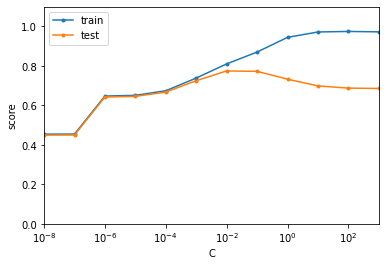

In [ ]:
# MODEL IMPLEMENTATION
from sklearn.model_selection import train_test_split

def plot_curve():
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state=0)
    plot_live(Xs, ys, evaluate_LR, 'C', np.logspace(-8, 3, num=12), scale='log', ylim=(0,1.1))
plot_curve()

### Question 1.3 (1 point)
Interpret the graph. At C=1e-6, is the model underfitting, overfitting, or neither? What about the model trained with C=100?

Your answer: ...

Model solution: At C=1e-6, the model is underfitting (both training and test score are low). At C=100, the model is overfitting (high training score but low test score). Indeed, a higher C value means less regularization. The best model uses C=0.02. 

### Question 2.1 (2 points)
Use the `plot_coefficients` plotting function to plot a heatmap of the coefficients of three models, one trained with C=10e-6, one with C=0.01, and one with C=10. Only plot the coefficients of the model that separates the character `tsu` from the other characters. You can assume that a one-vs-rest approach is used for multi-class problems, hence the n-th set of coefficients belong to the model that separates the n-th class. You should get three plots in total.

First split the data in a default stratified train-test split. Train the models on the training data and score the accuracy on the test data. Add the C-value and accuracy to the title of the plots. 

Note: You may get convergence warnings. If so, just increase the number of optimization iterations (`max_iter`). Especially models with high C values can take longer to converge (can you guess why?). You can also choose to ignore these warnings since they won't affect the results much.  
Note 2: Recent versions of scikit-learn use a more sophisticated approach than simple one-vs-all, but will still produce one model per class.

In [ ]:
# Implement. Do not change the name or signature of this function.
def plot_tsu_coefficients():
    pass
plot_tsu_coefficients()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


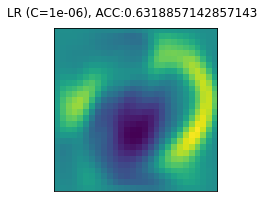

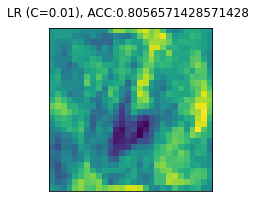

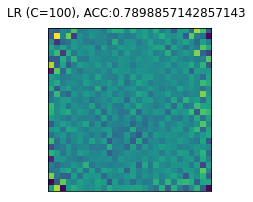

In [ ]:
### MODEL SOLUTION
def plot_tsu_coefficients():
  # Simple stratified train-test split
  X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)
  # 3 plots
  for c in [10e-6, 0.01, 10]:
    model = LogisticRegression(C=c, max_iter=1000).fit(X_train,y_train) # train
    acc = model.score(X_test, y_test) # score
    plot_coefficients(model.coef_[3],"LR (C={}), ACC:{}".format(c, acc)) # plot for class 3 (tsu)
plot_tsu_coefficients()

## Question 2.2 (1 point)
Interpret the results. Which model works best? What is each of the models paying attention to when making predictions? Does that make sense - i.e. did the model learn something useful about the character *tsu*? Compare this to the results
of question 1.2 and 1.3: does that help explain the accuracy results?

Your answer: ...

Model solution: The first plot shows a very smooth shape, this is the most common way of writing 'tsu' but it also misses many of the nuances. This model is clearly underfitting. It's too simple. This is also reflected in the accuracy score. The third figure is very noisy, which is a sign of overfitting: the model is too complex and doesn't generalize anymore. The middle plot has the best score and also has a good balance in capturing the different ways to write 'tsu'.

## Question 3.1 (2 point)
Let's focus more on the character 'tsu' and the behavior of the model with C=1e-6.

First split the data again in a default stratified train-test split. Train the models on the training data and produce the predictions on the test data.

Next, take the test examples which actually represent 'tsu'. From these, identify the ones which are predicted correctly and which ones are not.

Finally, plot these examples using the `plot_examples` function, together with the predicted class (character). Create two plots: one with 20 examples of 'tsu' characters which are predicted correctly, and a second with 20 examples of 'tsu' characters which are predicted incorrectly by this model.

In [ ]:
# Free form coding. Produce the two plots as requested. 
# Important: the plots must be correct when the notebook is restarted and run from top to bottom.
pass 

In [ ]:
# MODEL IMPLEMENTATION
model = LogisticRegression(C=1e-6).fit(X_train,y_train)
y_pred = model.predict(X_test)
actual_tsu = y_test == '3' # actual test examples of tsu
pred_tsu = y_pred == '3' # cases where the model thinks it's tsu
bad_mask = np.logical_and(actual_tsu, pred_tsu != actual_tsu) # unrecognized tsu
good_mask = np.logical_and(actual_tsu, pred_tsu == actual_tsu) # recognized tsu

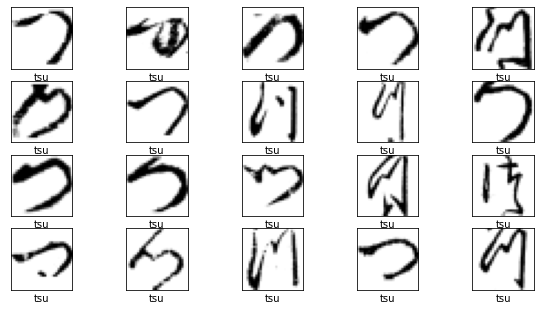

In [ ]:
plot_examples(X_test[good_mask].to_numpy()[0:20], y_pred[good_mask], row_length=5)

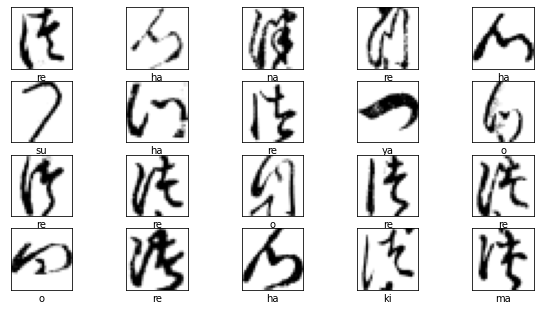

In [ ]:
plot_examples(X_test[bad_mask].to_numpy()[0:20], y_pred[bad_mask], row_length=5)

## Question 3.2 (1 point)
Interpret the results. Can you explain which kinds of 'tsu' characters are predicted correctly and which ones are not? Compare this with what you observed in question 2.1 and 2.2. What does that tell you about the model?

Your answer: ...

Model solution: It is clear that only the simple, 'round' versions of 'tsu' are predicted correctly, i.e. those that match the shape of the highly activated coefficients in the underfitted model. The other way of writing 'tsu' is not at all recognized by the underfitted model. Hence, this model, being forced to be simple (highly regularized), was only able to learn the simpler shape of this character. It was not flexible enough to learn that there are actually two ways to write it.